<a href="https://colab.research.google.com/github/shivkumarganesh/Advance-Deep-Learning/blob/main/Assignment%204/AutoViML_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries
- AutoViML
- Kaggle for data download
- split-folder to split data for classification

Ref : https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Image_Classification_Demo.ipynb

In [191]:
!pip install deep_autoviml
!pip install kaggle
!pip install split-folders tqdm
!rm -rf '/content/Mushrooms'
!rm -rf '/content/mushrooms'
!rm -rf '/content/mushrooms-classification-common-genuss-images.zip'

## Importing Kaggle.json
This will help us to get the kaggle data and then one can download the data from kaggle.

In [192]:
!mv kaggle.json ~/.kaggle/kaggle.json

Changing permission in order to make the file accessable.

In [193]:
!chmod 600 /root/.kaggle/kaggle.json

In [194]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
import tensorflow as tf

Downloadin the database for classifying the Mushrooms

In [195]:
!kaggle datasets download -d maysee/mushrooms-classification-common-genuss-images

100% 1.85G/1.85G [00:16<00:00, 38.2MB/s]
100% 1.85G/1.85G [00:16<00:00, 117MB/s] 


In [ ]:
!unzip /content/mushrooms-classification-common-genuss-images.zip

In [197]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/Mushrooms", output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values


Copying files: 6714 files [00:15, 423.37 files/s]


In [198]:
BATCHSIZE = 256
CLASSES = 9
EPOCHS = 3
NUM_TRIALS = 5

In [199]:
target = 'image' ### It doesn't matter what name you give for image target
datapath = '/content/output'

In [203]:
image_dir = datapath
img_height = 224
img_width = 224
img_channels = 3
image_dir

'/content/output'

In [204]:
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.
keras_options = {"early_stopping": True, 'lr_scheduler': 'rlr', "epochs": 3}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"optuna", "max_trials":2, 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 'image_height': img_height, 
                 'image_width':img_width, 'image_channels':img_channels }
## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####

# Training the model

    Only CPU found on this device
Setting CPU strategy using 1 devices
    Image directory given as /content/output
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/output. Returning...
Found 5367 files belonging to 9 classes.

Splitting train into two: train and validation data
Number of image classes = 9 and they are: ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus']
Training image model. This will take time...
Epoch 1/3
42/42 [==============================] - 201s 3s/step - loss: 1.9197 - accuracy: 0.3255 - val_loss: 1.4460 - val_accuracy: 0.5239
Epoch 2/3
42/42 [==============================] - 94s 2s/step - loss: 1.3580 - accuracy: 0.5278 - val_loss: 1.1672 - val_accuracy: 0.6075
Epoch 3/3
17/17 [==============================] - 27s 2s/step - loss: 1.0379 - accuracy: 0.6553
    Model accuracy in I

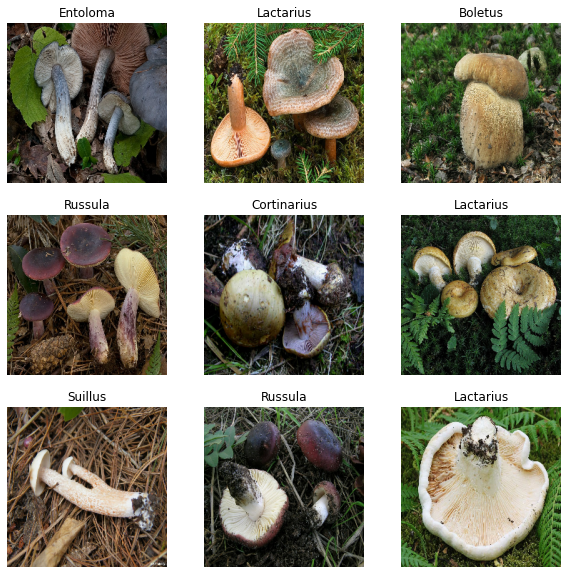

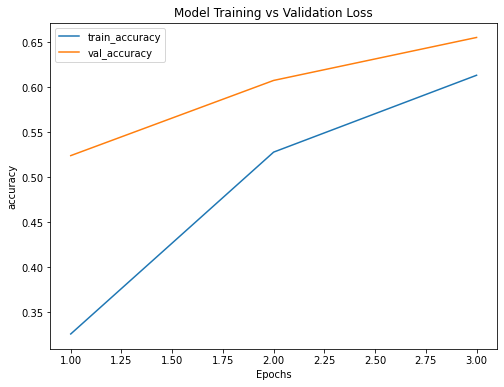

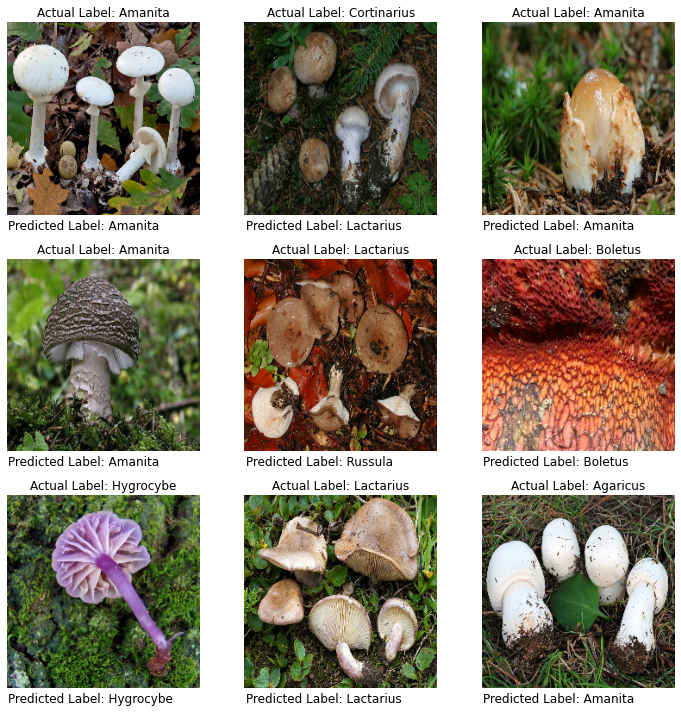

In [205]:
model, dicti = deepauto.fit("", 
                            target, 
                            keras_model_type=keras_model_type, 
                            project_name='output',
                            save_model_flag=False, 
                            model_options=model_options,model_use_case='', 
                            keras_options=keras_options, 
                            use_my_model='', 
                            verbose=0)

# Testing the model
The actual reference does not work in because of the arguments. So followed https://www.kaggle.com/rsesha/covid-19-image-classification-deep-autoviml

In [209]:
test_image_dir = datapath + '/test'
print(test_image_dir)
print(dicti)

predictions = deepauto.predict_images(test_image_dir, model, dicti, keras_model_type)

/content/output/test
{'target_variables': 'target', 'project_name': 'output', 'image_classes': ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe', 'Lactarius', 'Russula', 'Suillus'], 'target_transformed': True, 'modeltype': 'Classification', 'target_le': <deep_autoviml.utilities.utilities.My_LabelEncoder object at 0x7f8562944c10>, 'image_height': 224, 'image_width': 224, 'batch_size': 64, 'image_channels': 3}

Loading deep_autoviml model from <keras.engine.sequential.Sequential object at 0x7f855deba2d0> folder. This will take time...

Using <keras.engine.sequential.Sequential object at 0x7f855deba2d0> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/output/test
Found 679 files belonging to 9 classes.
    Sample predictions before inverse_transform: [2 8 6 2 6]
    Sample predictions after inverse_transform: ['Boletus' 'Suillus' 'Lactarius' 'Boletus' 'Lactarius']
